In [1]:
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd

In [2]:
cities = ["Tehran", "Mashhad", "Isfahan", "Tabriz", "Shiraz", "Ahvaz"]
cities_data = []

for city in cities:
    for day in range(1, 31):
        cities_data.append([
            city,
            day,
            random.randint(15, 41),
            random.randint(20, 81),
            random.randint(0, 51)
        ])

In [3]:
cities_data_frame = pd.DataFrame(cities_data, columns=["City", "Day", "Temperature (C)", "Humidity (%)", "Rainfall (mm)"])
print(cities_data_frame)

       City  Day  Temperature (C)  Humidity (%)  Rainfall (mm)
0    Tehran    1               34            56             36
1    Tehran    2               18            80             37
2    Tehran    3               37            62             50
3    Tehran    4               19            77              7
4    Tehran    5               36            30             41
..      ...  ...              ...           ...            ...
175   Ahvaz   26               37            28             28
176   Ahvaz   27               28            53             23
177   Ahvaz   28               17            61             40
178   Ahvaz   29               34            38             14
179   Ahvaz   30               16            79             50

[180 rows x 5 columns]


In [4]:
avg_stats = cities_data_frame.groupby("City")[["Temperature (C)", "Humidity (%)", "Rainfall (mm)"]].mean()
pd.options.display.float_format = "{:.3f}".format
print("Every cities average Temperature(C), Humidity(%) and Rainfall(mm)")
print(avg_stats)

Every cities average Temperature(C), Humidity(%) and Rainfall(mm)
         Temperature (C)  Humidity (%)  Rainfall (mm)
City                                                 
Ahvaz             27.533        50.567         26.133
Isfahan           28.100        51.100         23.133
Mashhad           27.467        57.133         31.067
Shiraz            26.767        54.067         26.700
Tabriz            28.467        51.000         25.533
Tehran            26.467        53.000         24.767


In [5]:
hottest_city = avg_stats["Temperature (C)"].idxmax()
coldest_city = avg_stats["Temperature (C)"].idxmin()
print(f"Hottest city: {hottest_city} (average temperature = {avg_stats.loc[hottest_city, 'Temperature (C)']:.2f}°C)")
print(f"Coldest city: {coldest_city} (average temperature = {avg_stats.loc[coldest_city, 'Temperature (C)']:.2f}°C)")

Hottest city: Tabriz (average temperature = 28.47°C)
Coldest city: Tehran (average temperature = 26.47°C)


In [6]:
rainy_days = cities_data_frame[cities_data_frame["Rainfall (mm)"] > 10].groupby("City")["Day"].count()
print("Days with rain more than 10mm:")
print(rainy_days)

Days with rain more than 10mm:
City
Ahvaz      25
Isfahan    23
Mashhad    27
Shiraz     26
Tabriz     23
Tehran     23
Name: Day, dtype: int64


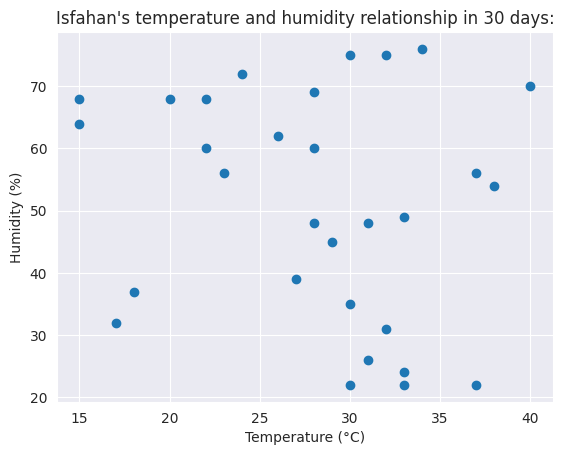

In [7]:
isfahan_data = cities_data_frame[cities_data_frame["City"] == "Isfahan"]
plt.scatter(isfahan_data["Temperature (C)"], isfahan_data["Humidity (%)"])
plt.title("Isfahan's temperature and humidity relationship in 30 days:")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()